# Ultimate Technologies Part 3 Model

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [2]:
# Check data

data = pd.read_csv('dataset.csv')

In [3]:
# Remove repeated index

data = data.iloc[:,1:]
data.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,signup_day,last_month_date,last_month_day
0,King's Landing,10,5,1.10,iPhone,True,46.2,3.67,5,1,25,6,17
1,Astapor,0,5,1.00,Android,False,50.0,8.26,5,0,29,5,5
2,Astapor,10,5,1.00,iPhone,False,100.0,0.77,5,0,6,1,7
3,King's Landing,10,5,1.14,iPhone,True,80.0,2.36,5,1,10,6,29
4,Winterfell,20,5,1.19,Android,False,82.4,3.13,5,0,27,3,15


In [4]:
# Check for data cleaning from before

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  object 
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   ultimate_black_user     50000 non-null  bool   
 6   weekday_pct             50000 non-null  float64
 7   avg_dist                50000 non-null  float64
 8   avg_rating_by_driver    50000 non-null  object 
 9   retained                50000 non-null  int64  
 10  signup_day              50000 non-null  int64  
 11  last_month_date         50000 non-null  int64  
 12  last_month_day          50000 non-null  int64  
dtypes: bool(1), float64(3), int64(5), object(4)
memory usage: 4.6+ MB


In [5]:
data.columns

Index(['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'phone', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained', 'signup_day', 'last_month_date',
       'last_month_day'],
      dtype='object')

# One hot encode categorical data

In [6]:
y = data['retained']

In [7]:
categorical = data[['city', 'avg_rating_of_driver',
       'phone', 'ultimate_black_user',
       'avg_rating_by_driver']]

In [8]:
numeric = data[['trips_in_first_30_days', 'avg_surge',
       'weekday_pct', 'avg_dist',
       'signup_day', 'last_month_date',
       'last_month_day']]

In [9]:
# One-hot encode all features in training set.
categorical = pd.get_dummies(categorical, drop_first=True)
categorical.head()

,ultimate_black_user,city_King's Landing,city_Winterfell,avg_rating_of_driver_2,avg_rating_of_driver_3,avg_rating_of_driver_4,avg_rating_of_driver_5,avg_rating_of_driver_none,phone_iPhone,phone_none,avg_rating_by_driver_2,avg_rating_by_driver_3,avg_rating_by_driver_4,avg_rating_by_driver_5,avg_rating_by_driver_none
0,True,1,0,0,0,0,1,0,1,0,0,0,0,1,0
1,False,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,False,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,True,1,0,0,0,0,1,0,1,0,0,0,0,1,0
4,False,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [10]:
# ultimate_black_user is still a boolean column, convert to 0 and 1

categorical['ultimate_black_user'] = categorical['ultimate_black_user'].astype('int')
categorical['ultimate_black_user'].isnull().sum()

0

In [11]:
# Combine features to create the feature matrix

X = pd.concat([categorical, numeric], axis=1).reindex(categorical.index)
X.head()

,ultimate_black_user,city_King's Landing,city_Winterfell,avg_rating_of_driver_2,avg_rating_of_driver_3,avg_rating_of_driver_4,avg_rating_of_driver_5,avg_rating_of_driver_none,phone_iPhone,phone_none,...,avg_rating_by_driver_4,avg_rating_by_driver_5,avg_rating_by_driver_none,trips_in_first_30_days,avg_surge,weekday_pct,avg_dist,signup_day,last_month_date,last_month_day
0,1,1,0,0,0,0,1,0,1,0,...,0,1,0,10,1.10,46.2,3.67,25,6,17
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1.00,50.0,8.26,29,5,5
2,0,0,0,0,0,0,1,0,1,0,...,0,1,0,10,1.00,100.0,0.77,6,1,7
3,1,1,0,0,0,0,1,0,1,0,...,0,1,0,10,1.14,80.0,2.36,10,6,29
4,0,0,1,0,0,0,1,0,0,0,...,0,1,0,20,1.19,82.4,3.13,27,3,15


# Train Test Split

In [12]:
# 10% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=123)

In [13]:
# Approx 20% for val
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.22, random_state=123)

In [14]:
print('X_train: ', len(X_train))
print('y_train: ', len(y_train))
print('X_val: ', len(X_val))
print('y_val: ', len(y_val))
print('X_test: ', len(X_test))
print('y_test: ', len(y_test))

X_train:  35100
y_train:  35100
X_val:  9900
y_val:  9900
X_test:  5000
y_test:  5000


In [18]:
y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()

In [15]:

#fit scaler with training data and apply it to train, val and test data 

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_val_scaled=scaler.transform(X_val)
X_test_scaled=scaler.transform(X_test)


# Because we have skewed numeric data and an unbalanced data set we will use a Random Forest Classifier

In [28]:
# Set up parameters for Grid Search

# Number of trees in random forest
n_estimators = [400, 500, 600, 700]
# Maximum number of levels in tree
max_depth = [5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10, 15, 20, 25]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
params = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(params)

{'bootstrap': [True, False],
 'max_depth': [5, 10, 15, 20],
 'min_samples_leaf': [10, 15, 20, 25],
 'n_estimators': [400, 500, 600, 700]}


In [29]:
# Fit model to training data


from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()

rf_random = GridSearchCV(estimator = rf, param_grid = params, cv = 10, n_jobs = -1)

rf_random.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

# Validation Results

In [36]:
from sklearn.metrics import accuracy_score

best_random = rf_random.best_estimator_

y_pred = best_random.predict(X_val_scaled)
y_pred_prob = best_random.predict_proba(X_val_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_val, y_pred)
ac

1.0

In [31]:
class_names = ['Retained', 'Not Retained']

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    Retained       1.00      1.00      1.00      6243
Not Retained       1.00      1.00      1.00      3657

    accuracy                           1.00      9900
   macro avg       1.00      1.00      1.00      9900
weighted avg       1.00      1.00      1.00      9900



Confusion matrix, without normalization
[[6243    0]
 [   0 3657]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


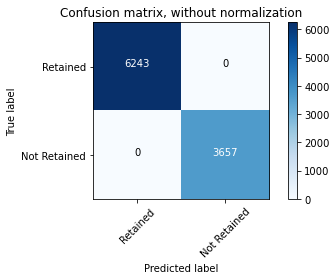

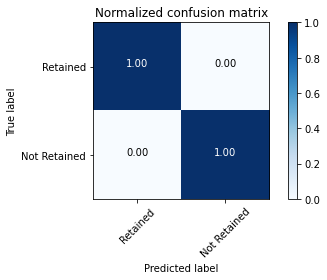

In [39]:

# confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")

# Test Results

In [40]:
from sklearn.metrics import accuracy_score

best_random = rf_random.best_estimator_

y_pred = best_random.predict(X_test_scaled)
y_pred_prob = best_random.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)
ac

1.0

In [41]:
class_names = ['Retained', 'Not Retained']

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    Retained       1.00      1.00      1.00      3099
Not Retained       1.00      1.00      1.00      1901

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



Confusion matrix, without normalization
[[3099    0]
 [   0 1901]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


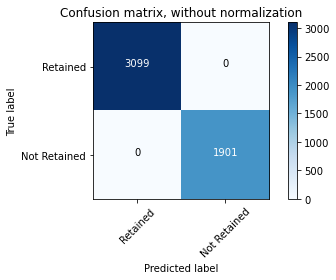

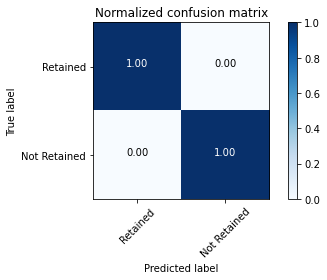

In [43]:

# confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")

# Feature Importances

22


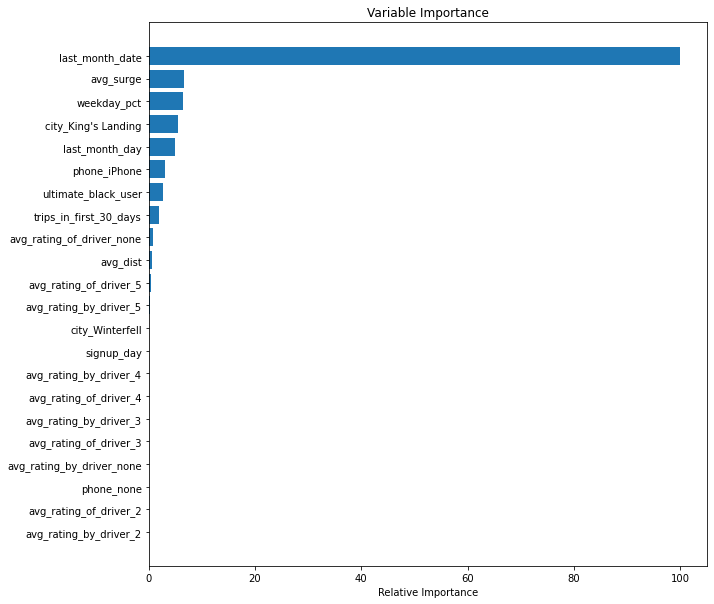

In [44]:
feature_importance = best_random.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Because the results here match really well with the exploratory data analysis, showing the last month date as the most important variable as we saw January having the maximum average number of retention loss, and the maximum average surge (due potentially to people coming back from winter vacation and only using the service once), surge as the second most important variable  makes sense because the surge in demand was happening at the same time as the retention loss. For this reasons I will reiterate the insights we reached at the summary in the previous notebook:


### Improving the driver scores would seem to be most important in this case, finding methods to improve their mood and stress levels if that is the factor that is causing low ratings or investigate potential causes for bad driver reviews. We make no causal claims here, but we know the maximum average surge occurs in January, users use the service, give the drivers a low rating. This is not a connection the model can necessarily see, as the low driver scores mathematically have nothing to do with the maximum avg surge and that everyone travels in January. User experience is very important, the demand during this period is very high and might monetarily make up for the fact that drivers use the service only once a year (we would have to test that with the necessary financial data). Certainly if they are having a bad experience with the drivers during their single ride, they might be using a different company the next time around, and the company will lose the money making opportunity of this large surge in demand